In [1]:
#pip install optuna

In [2]:
#pip install xgboost

In [3]:
#!brew install lightgbm

In [4]:
#pip install catboost

In [5]:
#!pip install -q pycaret

In [6]:
#conda list scikit

In [7]:
#pip install ruamel.yaml

In [8]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import optuna



AttributeError: module 'graphviz.backend' has no attribute 'ENCODING'

In [9]:
train_data = pd.read_csv('/Users/sameedsajid/OneDrive - City University of Hong Kong/SEM B 21:22/Machine Learning/Project 1/train.csv')

In [10]:
test_data = pd.read_csv('/Users/sameedsajid/OneDrive - City University of Hong Kong/SEM B 21:22/Machine Learning/Project 1/test.csv')

In [11]:
sample_submission = pd.read_csv('/Users/sameedsajid/OneDrive - City University of Hong Kong/SEM B 21:22/Machine Learning/Project 1/sample_submission.csv')

In [12]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


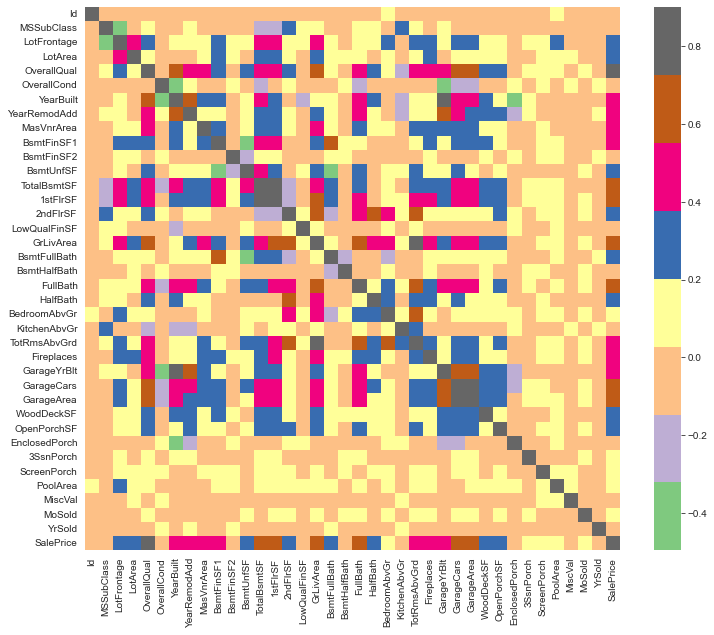

In [14]:
#We need to identify the most features affecting the sale price the most
#We can use a correlation matrix, and a heat map to show the outcome
crmt = train_data.corr()
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(crmt,vmax=0.9, cmap = "Accent");

<AxesSubplot:>

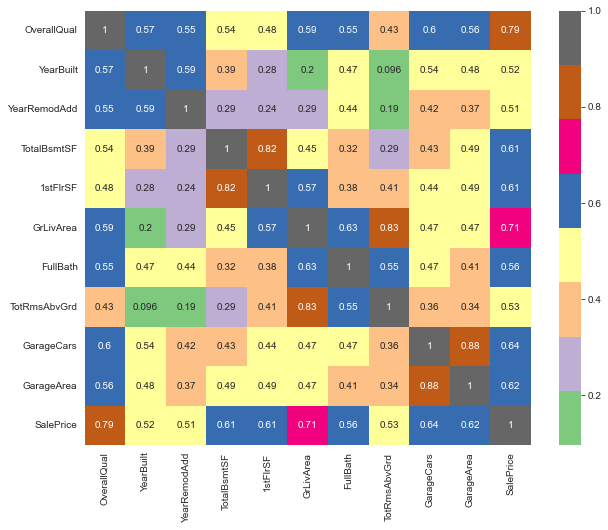

In [15]:
plt.figure(figsize=(10,8))

sns.heatmap(train_data[crmt.index[abs(crmt["SalePrice"])>0.5]].corr(),annot=True, cmap="Accent")

# Data Cleaning

In [16]:
train_data.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
#separating the SalePrice and id column
target = train_data['SalePrice']
test_ids = test_data['Id']

train1 = train_data.drop(['Id','SalePrice'], axis = 1)
test1 = test_data.drop('Id', axis = 1)

data1 = pd.concat([train1,test1], axis=0).reset_index(drop = True)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [18]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [19]:
# showing all numeric columns

data1.select_dtypes(np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [20]:
#changing MSubClass from int to string since it is an encoded categorical variable
data2 = data1.copy()
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

# Working with and filling missing categorical values

In [21]:
#Fill categorical missing values

In [22]:
#features like alley access, their missing values has a meaning, so we won't fill them with the mode, but with their own value

#Impute using column mode(eg no basement is now given some meaning using None instead of N/A)

for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature',
        
]:
    data2[column] = data2[column].fillna("None")




for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
    
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])



#Impute using a constant value

In [23]:
#shows all object columns with missing values
data2.select_dtypes('object').loc[:,data2.isna().sum() > 0].columns

Index([], dtype='object')

In [24]:
data2.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [25]:
data2.select_dtypes('object').isna().sum().sum()

0

In [26]:
data3 = data2.copy()

# Numeric Missing Values

In [27]:
data3.select_dtypes(np.number).isna().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [28]:
knn = KNeighborsRegressor()


In [29]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [30]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data3 = knn_impute(data3, column)

In [31]:
#no missing values now
data3.isna().sum().sum()

0

In [32]:
data4 = data3.copy()

# Feature Engineering 

In [33]:
data4["SqFtPerRoom"] = data4["GrLivArea"] / (data4["TotRmsAbvGrd"] +
                                                       data4["FullBath"] +
                                                       data4["HalfBath"] +
                                                       data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + (0.5 * data4['HalfBath']) +
                               data4['BsmtFullBath'] + (0.5 * data4['BsmtHalfBath']))

#squarefootage
data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [34]:
data4

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2008,WD,Normal,142.500000,12,3.5,1710
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0,5,2007,WD,Normal,140.222222,14,2.5,1262
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0,9,2008,WD,Normal,178.600000,12,3.5,1786
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0,2,2006,WD,Abnorml,190.777778,12,2.0,1717
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0,12,2008,WD,Normal,169.076923,13,3.5,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,6,2006,WD,Normal,136.500000,11,1.5,1092
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,4,2006,WD,Abnorml,121.333333,9,1.5,1092
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,9,2006,WD,Abnorml,136.000000,12,2.0,1224
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,700,7,2006,WD,Normal,121.250000,10,1.5,970


In [35]:
data5 = data4.copy()

# Feature Transformation
Log transform for skewed features

In [36]:
#checking the skew
#positive value shows positively skewed. 
scipy.stats.skew(data5['LotFrontage'])

1.3407511399227516

In [37]:
scipy.stats.skew(data5.select_dtypes(np.number))

array([ 1.34075114, 12.8224314 ,  0.19711045,  0.57031205, -0.59980555,
       -0.45102038,  2.60368152,  1.42551624,  4.14611071,  0.91932181,
        1.16280584,  1.46960442,  0.86167475, 12.088761  ,  1.26935769,
        0.62437257,  3.93159384,  0.16760573,  0.69456649,  0.32632435,
        4.30225437,  0.75836691,  0.7334946 , -0.34632694, -0.21859252,
        0.24089573,  1.84243281,  2.53511373,  4.00389122, 11.37606468,
        3.9466937 , 16.89832792, 21.94719481,  0.19588394,  0.13239881,
        0.8939916 , -0.56412339,  0.49340224,  1.25203567])

In [38]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df
#shows the skew of all numeric features

,Feature,Skew
0,LotFrontage,1.340751
1,LotArea,12.822431
2,OverallQual,0.197110
3,OverallCond,0.570312
4,YearBuilt,-0.599806
5,YearRemodAdd,-0.451020
6,MasVnrArea,2.603682
7,BsmtFinSF1,1.425516
8,BsmtFinSF2,4.146111
9,BsmtUnfSF,0.919322


In [39]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df
#shows the skew of all numeric features

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [40]:
#gives all skewed columns
data5[skew_df.query("Skewed == True")['Feature'].values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SqFtPerRoom,Total_Home_Quality,HighQualSF
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,70.154916,10168.114080,5.564577,1971.312778,102.189654,441.332580,49.576841,560.797670,1051.679822,1159.581706,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,157.116695,11.653649,1496.065433
std,22.697641,7886.996359,1.113131,30.291442,178.934095,455.559081,169.176867,439.470508,440.722380,392.362079,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,27.923999,1.712435,503.675790
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.400000,2.000000,334.000000
25%,60.000000,7478.000000,5.000000,1953.500000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.142857,11.000000,1120.000000
50%,70.000000,9453.000000,5.000000,1973.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.285714,12.000000,1440.000000
75%,80.100000,11570.000000,6.000000,2001.000000,164.000000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.333333,13.000000,1742.500000
max,313.000000,215245.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,352.625000,19.000000,5642.000000


In [41]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])

In [42]:
data5['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

# cosine transform for cyclical features

In [43]:
#what this function doesn is that it understands the difference between hot and cold months. For cold months, like 1 for jan or 12 for dec, it gives a negative value, and for middle months like june, it gives a positive value indiccating hot. 
-np.cos(0.5236*data5['MoSold'])

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
2914    1.000000
2915    0.500004
2916   -0.000011
2917    0.866021
2918   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [44]:
np.min(-np.cos(0.5236*data5['MoSold']))

-0.9999999998920606

In [45]:
np.max(-np.cos(0.5236*data5['MoSold']))

0.9999999999730151

In [46]:
np.mean(-np.cos(0.5236*data5['MoSold']))

0.34286598537322777

In [47]:
data5['MoSold'] = -np.cos(0.5236*data5['MoSold'])

In [48]:
data5['MoSold']

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -1.000000
          ...   
2914    1.000000
2915    0.500004
2916   -0.000011
2917    0.866021
2918   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [49]:
data6 = data5.copy()

In [50]:
data6

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,-0.499998,2008,WD,Normal,4.966335,2.564949,3.5,7.444833
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0.000000,0.866028,2007,WD,Normal,4.950335,2.708050,2.5,7.141245
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0.000000,-0.000011,2008,WD,Normal,5.190732,2.564949,3.5,7.488294
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0.000000,-0.499998,2006,WD,Abnorml,5.256337,2.564949,2.0,7.448916
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0.000000,-1.000000,2008,WD,Normal,5.136251,2.639057,3.5,7.695758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,1.000000,2006,WD,Normal,4.923624,2.484907,1.5,6.996681
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,0.500004,2006,WD,Abnorml,4.806750,2.302585,1.5,6.996681
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0.000000,-0.000011,2006,WD,Abnorml,4.919981,2.564949,2.0,7.110696
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,6.552508,0.866021,2006,WD,Normal,4.806068,2.397895,1.5,6.878326


# Encode Categoricals

In [51]:
data6 = pd.get_dummies(data6)

In [52]:
#all categorical variables get their own columns
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
2915,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
2916,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [53]:
data7 = data6.copy()

# Scaling

In [54]:
#Standardize features by removing the mean and scaling to unit variance.

scaler = StandardScaler()
scaler.fit(data7)

data7 = pd.DataFrame(scaler.transform(data7), index=data7.index, columns=data7.columns)

In [55]:
data7

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [56]:
data8 = data7.copy()

# Target Transformation

In [57]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

<AxesSubplot:>

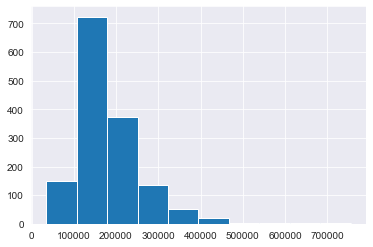

In [58]:
target.hist()

/Users/sameedsajid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


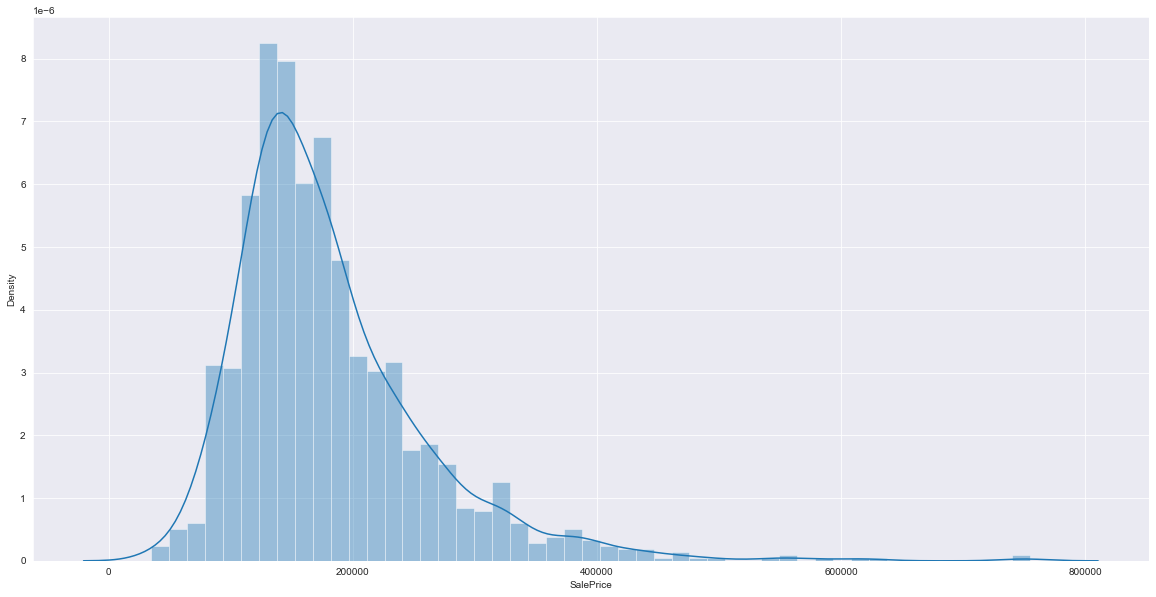

In [59]:
plt.figure(figsize=(20, 10))
sns.distplot(target, kde=True)
plt.show()

#this shows us that the data is more skewed towards the right hand side

/Users/sameedsajid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sameedsajid/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


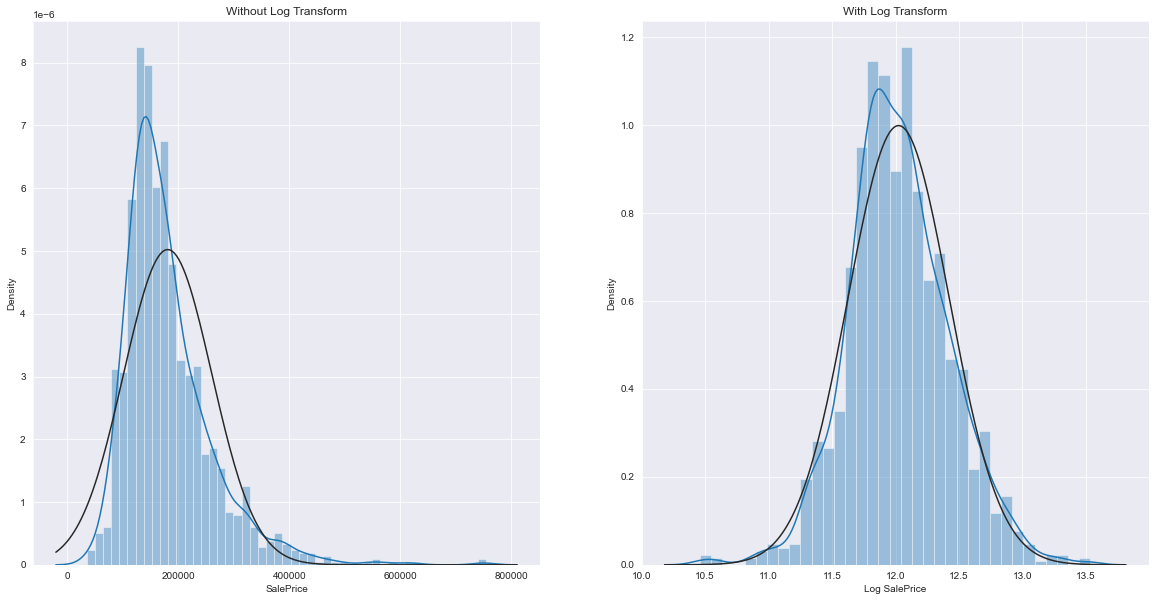

In [60]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
sns.distplot(target, kde=True,fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [61]:
np.min(target)

34900

In [62]:
log_target = np.log(target)

In [63]:
#we will make predictions on log_target
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [64]:
np.exp(log_target) #to convert back to exponential form

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

# At  this point, our data processing has been done, and now we move onto model selection

# Splitting data

In [65]:
train1.index.max()

1459

In [66]:
test1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [67]:
data8.loc[:train1.index.max(), :]


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [68]:
data8.loc[train1.index.max() + 1:, :]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1461,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1462,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1463,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1464,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [69]:
train_final = data8.loc[:train1.index.max(), :].copy()
test_final = data8.loc[train1.index.max() + 1:, :].reset_index(drop = True).copy()

In [70]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [ ]:
#setup(data=pd.concat([train_final, log_target], axis=1), target='SalePrice')

In [ ]:
#compare_models()

#catbooost
#br
huber
ridge
omp
lightgbm
gbr
xgboost

# BaseLine Model

In [71]:
baseline_model = CatBoostRegressor(verbose=0)

In [72]:
baseline_model.fit(train_final,log_target)

# Linear Regression

In [73]:
baseline_model2 = LinearRegression().fit(train_final,log_target)

In [74]:
kf = KFold(n_splits = 10)

linear_result = cross_val_score(baseline_model2,train_final,log_target,scoring = 'neg_mean_squared_error',cv = kf)
linear_result

array([-1.25552315e+23, -6.89761732e+24, -1.02787668e+24, -2.61186182e+24,
       -4.55504733e+23, -2.65783486e+22, -3.25937387e+24, -2.66585896e+23,
       -3.30625842e+24, -4.39794837e+24])

In [75]:
np.sqrt(np.mean(-linear_result))

1495832803887.5815

In [78]:
np.exp(np.sqrt(np.mean(-linear_result)))

/var/folders/tp/zxff3h0n1l321mt9pq12m2gr0000gn/T/ipykernel_26451/1842467943.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(np.sqrt(np.mean(-linear_result)))


inf

# Ridge Regression

In [86]:
baseline_model3 = Ridge().fit(train_final,log_target)

In [87]:
kf = KFold(n_splits = 10)

r_result = cross_val_score(baseline_model3,train_final,log_target,scoring = 'neg_mean_squared_error',cv = kf)
r_result

array([-0.01586419, -0.01102302, -0.01400801, -0.026523  , -0.02243105,
       -0.02371093, -0.01550817, -0.00966693, -0.03911687, -0.01591496])

<Figure size 1152x720 with 0 Axes>

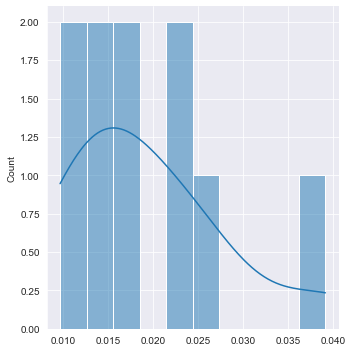

In [89]:
plt.figure(figsize = (16,10))

sns.displot(-r_result,bins = 10,kde = True)

In [90]:
np.mean(-r_result)

0.01937671190620201

In [92]:
np.sqrt(np.mean(-r_result))

0.13920025828353197

In [95]:
np.exp(np.sqrt(np.mean(-r_result)))

1.1493542446668554

# Evaluate

In [337]:
kf = KFold(n_splits = 10)

results = cross_val_score(baseline_model,train_final,log_target,scoring = 'neg_mean_squared_error',cv = kf)

#here we apply cv to our training data, divivding it into 10 splits, in each run, 1 split is used as a test set, 
#while the other 9 splits as train set, the result comes from each run hence a list of 10(neg mean square error of each cv) 

In [338]:
results

array([-0.01312219, -0.00872703, -0.01081891, -0.02351299, -0.02058943,
       -0.01062314, -0.01344779, -0.00894213, -0.01456253, -0.01615045])

<Figure size 1152x720 with 0 Axes>

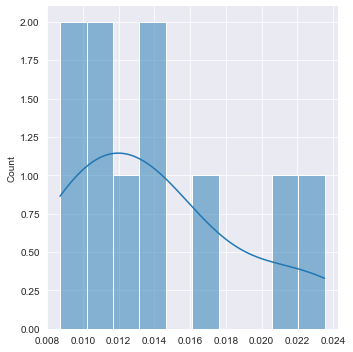

In [339]:
plt.figure(figsize = (16,10))

sns.displot(-results,bins = 10,kde = True)

In [340]:
np.mean(-results)
#gives the mean squared error across all cross validations

0.014049656678780378

In [341]:
np.sqrt(np.mean(-results))

0.11853124768929237

In [342]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [343]:
#since we were working with the log_target, to convert it back into its original form, we will just exponentiate it
np.exp(np.sqrt(np.mean(-results)))

1.1258420535150253

In [344]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

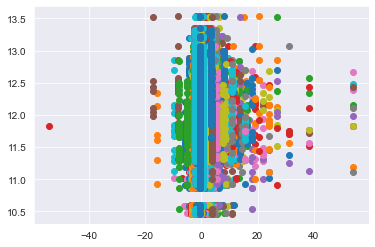

In [345]:
%matplotlib inline
plot(train_final,log_target,'o')

# Hyper Paramter Optimization

In [358]:
 def br_objective(trial):
     n_iter = trial.suggest_int('n_iter', 50, 600)
     tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
     alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
     alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
     lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
     lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)
    
     model = BayesianRidge(
         n_iter=n_iter,
         tol=tol,
         alpha_1=alpha_1,
         alpha_2=alpha_2,
         lambda_1=lambda_1,
         lambda_2=lambda_2
     )
    
     model.fit(train_final, log_target)
    
     cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
     return np.mean(cv_scores)

In [359]:
study = optuna.create_study(direction='minimize')
study.optimize(br_objective, n_trials=100)


[I 2022-02-20 16:17:44,059] A new study created in memory with name: no-name-574331af-9723-4e9a-9036-338a905cbbab
[I 2022-02-20 16:17:46,673] Trial 0 finished with value: 1.1462428187111169 and parameters: {'n_iter': 401, 'tol': 0.0612625144574569, 'alpha_1': 8.897281877678415e-07, 'alpha_2': 1.1404609839736764e-08, 'lambda_1': 0.06007794433223793, 'lambda_2': 0.9785461119330706}. Best is trial 0 with value: 1.1462428187111169.
[I 2022-02-20 16:17:48,793] Trial 1 finished with value: 1.1471892610211292 and parameters: {'n_iter': 346, 'tol': 3.546196270996687e-05, 'alpha_1': 0.2282249608577888, 'alpha_2': 1.054504091827012e-05, 'lambda_1': 9.896844240172953e-08, 'lambda_2': 2.2053051682283487}. Best is trial 0 with value: 1.1462428187111169.
[I 2022-02-20 16:17:50,914] Trial 2 finished with value: 1.1490152694091134 and parameters: {'n_iter': 275, 'tol': 3.056031180616318e-06, 'alpha_1': 0.0022182414922236383, 'alpha_2': 2.3642231516662525e-05, 'lambda_1': 1.0791358747254988e-08, 'lambd

In [360]:
study.best_params

{'n_iter': 447,
 'tol': 2.2810770213337403e-06,
 'alpha_1': 6.034233371203046e-07,
 'alpha_2': 9.789358680003904,
 'lambda_1': 9.871580061421591,
 'lambda_2': 0.000696514536224778}

# Bagging Ensemble

In [346]:
#Bagging is combining models and training them in parallel

In [361]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

In [362]:
#making a ditionary of all our models

models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "br": BayesianRidge(**br_params),
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "ridge": Ridge(**ridge_params),
    "omp": OrthogonalMatchingPursuit()
}

In [363]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

catboost trained.
br trained.
lightgbm trained.
ridge trained.
omp trained.


# Evaluate Models

In [349]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [350]:
results
#result shows each algorithm and the array of CV rmse in the unit of the original target variables 

{'catboost': array([1.12137109, 1.0979212 , 1.10961596, 1.16572061, 1.15429545,
        1.10856747, 1.1229561 , 1.09917824, 1.1282585 , 1.13551286]),
 'br': array([1.12602377, 1.10616614, 1.12611315, 1.16757451, 1.1538817 ,
        1.14241025, 1.12818432, 1.10269152, 1.1964089 , 1.13427592]),
 'lightgbm': array([1.14072332, 1.10958619, 1.1280904 , 1.17558006, 1.1705364 ,
        1.11606232, 1.14357955, 1.11726391, 1.13796462, 1.15241648]),
 'ridge': array([1.13422902, 1.11070014, 1.12564415, 1.17687054, 1.16156706,
        1.16647167, 1.13261802, 1.10331637, 1.21869406, 1.13445742]),
 'omp': array([1.13163194, 1.10136166, 1.12704954, 1.18074775, 1.16256399,
        1.17119603, 1.12960897, 1.12360152, 1.1832052 , 1.15073542])}

In [351]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))
    
#we print out the mean and std for each model. 

----------
catboost
1.1243397483303448
0.021347690994208062
----------
br
1.138373019591588
0.02685435954532363
----------
lightgbm
1.1391803245122418
0.021260579143552734
----------
ridge
1.1464568442598275
0.03290888943873464
----------
omp
1.146170202554281
0.02617531962029006


# Combine Models

In [352]:
models['catboost'].predict(test_final)

array([11.7186606 , 11.97758378, 12.12271074, ..., 11.96367522,
       11.60126969, 12.26622949])

In [353]:
np.exp(models['catboost'].predict(test_final))

array([122842.77936169, 159147.03102954, 184003.62553464, ...,
       156948.84722928, 109236.40755208, 212400.6210548 ])

In [364]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['br'].predict(test_final)) +
    0.2 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['ridge'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final))
)


In [365]:
final_predictions

array([122745.21390189, 158010.72765742, 180631.78595504, ...,
       160694.94514446, 116423.18031009, 218810.24783461])

# Making a submission

In [370]:
submission = pd.concat([test_ids, pd.Series(final_predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,122745.213902
1,1462,158010.727657
2,1463,180631.785955
3,1464,192844.417079
4,1465,191491.273338
...,...,...
1454,2915,86009.484873
1455,2916,81434.967663
1456,2917,160694.945144
1457,2918,116423.180310


In [371]:
submission.to_csv('./submission.csv', index=False, header=True)